In [33]:
import pandas as pd

pd.__version__

'1.3.4'

In [2]:
import boto3

boto3.__version__

'1.24.82'

In [24]:
from io import BytesIO

In [14]:
!conda list

# packages in environment at /home/ec2-user/anaconda3/envs/python3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2021.11                  py38_0  
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
aiobotocore               2.0.1                    pypi_0    pypi
aiohttp                   3.8.1            py38h497a2fe_0    conda-forge
aioitertools              0.8.0              pyhd8ed1ab_0    conda-forge
aiosignal                 1.2.0              pyhd8ed1ab_0    conda-forge
alabaster                 0.7.12                     py_0    conda-forge
alsa-lib                  1.2.3                h516909a_0    conda-forge
anaconda-client           1.8.0              pyhd8ed1ab_0    conda-forge
anaconda-project          0.10.2             pyhd8ed1ab_0    conda-forge
anyio                     3.4.0            py38h578d9bd_0    conda-forge
appdirs

In [8]:
!aws s3 ls s3://tmp-objects-uw2/

2022-10-15 10:39:16      15522 amazon-reviews.csv


In [25]:
def from_s3(s3_bucket: str, s3_key: str) -> pd.DataFrame:
    client = boto3.client("s3")

    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    bytes_ = BytesIO(obj["Body"].read())
    
    # 각 확장자마다 다 불러올 수 있음 (ex. xlsx, parquet 등)
    return pd.read_csv(bytes_)

In [26]:
# 판다스 데이터프레임은 df라는 약칭으로 씀 (ex. data_df, review_df 등)

df = from_s3('tmp-objects-uw2', 'amazon-reviews.csv')

# 판다스 데이터프레임의 기본 상태 확인하기

판다스를 사용해 데이터프레임을 불러오면, 일단 해야 하는 것은 데이터의 상태 확인하기임

In [29]:
# 처음 행 출력(기본값: 5)
df.head()

,Written in old English. It was very hard to read as I had to think through most sentences to figure out what was being said.
0,Thought I was getting a book received book on ...
1,this book was recommend 2 me from my neighbor....
2,I believe that this is a fantastic book for th...
3,I always liked this book. The kindle version i...
4,Hawthorne wrote a masterful work of historical...


In [30]:
# N개 행 출력 (ex. 15)
df.head(15)

,Written in old English. It was very hard to read as I had to think through most sentences to figure out what was being said.
0,Thought I was getting a book received book on ...
1,this book was recommend 2 me from my neighbor....
2,I believe that this is a fantastic book for th...
3,I always liked this book. The kindle version i...
4,Hawthorne wrote a masterful work of historical...
5,I was quite pleased with the condition of this...
6,I know this is a classic but I just could not ...
7,"I did not read much of this book, however, I d..."
8,I had to read The Scarlett Letter for my honor...
9,"I read this ""Classic"" novel for a class, and m..."


> 예제로 불러온 csv파일은 header가 없음
> 
> 따라서 맨 위의 줄도 데이터임에도 불구하고 header로 인식함
> 
> 데이터프레임을 불러올 때 옵션을 설정할 수 있음

In [40]:
def from_s3(s3_bucket: str, s3_key: str) -> pd.DataFrame:
    client = boto3.client("s3")

    obj = client.get_object(Bucket=s3_bucket, Key=s3_key)
    bytes_ = BytesIO(obj["Body"].read())
    
    # 데이터의 맨 첫째 줄이 header가 아닌 경우 `header=None` 옵션을 사용하면 됨
    return pd.read_csv(bytes_, header=None)

df = from_s3('tmp-objects-uw2', 'amazon-reviews.csv')

In [41]:
df.head()

,0
0,Written in old English. It was very hard to re...
1,Thought I was getting a book received book on ...
2,this book was recommend 2 me from my neighbor....
3,I believe that this is a fantastic book for th...
4,I always liked this book. The kindle version i...


In [42]:
# 맨 아래의 데이터 확인(기본값: 5, head()와 똑같이 숫자를 지정하면 해당 개수의 row를 불러옴)
df.tail()

,0
31,a classic book where there is really nothing b...
32,"I had to read this book, which I had heard qui..."
33,This book was purchased for my daughter for a ...
34,A classic? Hardly. In it's time this book may ...
35,The whole time reading The Scarlet Letter I th...


In [43]:
# 데이터프레임의 자료구조 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       36 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


In [44]:
# 숫자 데이터의 통계값을 보여줌, object 데이터는 해당사항 없음
df.describe()

,0
count,36
unique,36
top,Written in old English. It was very hard to re...
freq,1


# 데이터프레임의 데이터 제어

https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

### 칼럼 추가하기

**칼럼 추가는 기존의 데이터프레임에 추가하는 개념이 절대 아님**

새로운 리스트를 만들고, 그 리스트를 원래 데이터프레임을 더해 **새로운 데이터프레임을 생성**하는 개념

In [53]:
# ex. 예제 문장의 문장 길이 수를 칼럼을 새로 추가한다고 가정
#
# 1. for문을 돌려서 데이터프레임의 각 칼럼을 가져옴
# 2. 문장의 길이를 파악한 후 리스트에 append
# 3. for문이 끝나면 assign 메소드를 사용해 새로운 데이터프레임 생성

sentence_len = []

# 데이터프레임을 for문을 돌릴 때, interator를 사용해 데이터를 가져올 수 있음
# iterator의 종류는 다양함, 여기서는 그냥 튜플로 사용(튜플은 인덱스로 데이터를 가져올 수 있기 때문)
for row in df.itertuples():
    print(row[1])
    sentence_len.append(len(row[1]))

# assign 메소드 : 원하는 칼럼명과 리스트를 파라미터에 삽입 -> 새로운 데이터프레임이 생성됨
df_with_len = df.assign(len=sentence_len)

Written in old English. It was very hard to read as I had to think through most sentences to figure out what was being said.
Thought I was getting a book received book on tape. a little deceiving. Rather than that the process went as expected. If it had been what we wanted would have been great.
this book was recommend 2 me from my neighbor. but i dont think that dis is dat gud of a book 2 recommend... i didnt like it 2 much but...
I believe that this is a fantastic book for those who have more distinguished tastes. As for others, it is a slow read with challenging vocabulary.
I always liked this book. The kindle version is kind of difficult to navigate but it does its purpose. I can still go back to my last read without any problem.
Hawthorne wrote a masterful work of historical fiction incorporating an examination of guilt, revenge and suffering in the context of Puritan Salem. Here is a book that speaks to any age about timeless themes. The Scarlet Letter is one of those books that 

In [54]:
# 새로 추가한 칼럼의 상태 확인

df_with_len.info()

# len에 대해서는 정수(integer)로 잘 인식됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       36 non-null     object
 1   len     36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


### 칼럼 삭제하기

삭제는 `drop()` 메소드를 사용할 수 있음

하지만 `drop()`은 row도 삭제할 수 있음(따라서 `axis` 파라미터를 사용해 '칼럼을 삭제하겠다'는 것을 명시해야 함)

In [56]:
# len 칼럼 삭제하기

# 칼럼 이름을 지정할 수도 있고(ex. 'len'), 칼럼 인덱스를 지정할 수도 있음(ex. df.columns[[0, 1, 3]])
# axis=1을 반드시 설정해야 칼럼을 지울 수 있음(지정하지 않으면 row가 지워지거나 오류 발생 가능)
df_with_drop = df_with_len.drop('len', axis=1)

# 삭제한 칼럼의 상태 확인
df_with_drop.info()

# len 칼럼이 삭제된 것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       36 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


## 로우 삭제하기

### for문에서 원하는 항목 삭제

In [94]:
# 실습을 위해 위에서 만든 데이터프레임 복사

df_copy = df_with_len

# 원래 데이터의 길이 보기
df_copy.shape

(36, 2)

In [105]:
# 글자 길이가 300자 미만인 로우만 남기고, 300자 이상은 삭제해보기

# 삭제할 로우의 인덱스 리스트
delete_rows = []

for row in df_copy.itertuples():
#     print(row)
    
    if row.len >= 300:  # 300 이상이면 삭제
        delete_rows.append(row.Index)

df_copy_result = df_copy.drop(delete_rows)
df_copy_result

,0,len
0,Written in old English. It was very hard to re...,124
1,Thought I was getting a book received book on ...,171
2,this book was recommend 2 me from my neighbor....,138
3,I believe that this is a fantastic book for th...,147
4,I always liked this book. The kindle version i...,159
7,I know this is a classic but I just could not ...,142
12,i liked good book from the past....great that ...,100
15,This book has to be one of the most tedious wo...,227
17,Thie book isnt terrible I had to read it for m...,218
18,i couldn't listen to this book because the wom...,230


In [106]:
# 300자 미만만 있는 데이터프레임의 길이 보기

df_copy_result.shape

(16, 2)

### for문 없이 삭제

In [67]:
# 실습을 위해 위에서 만든 데이터프레임 복사

df_copy2 = df_with_len

# 원래 데이터의 길이 보기
df_copy2.shape

(36, 2)

In [107]:
# `loc()` 메소드를 사용해 한줄로 로직 구현

df_copy2_result = df_copy2.loc[df_copy2['len'] < 300]

df_copy2_result.shape

(16, 2)

In [110]:
# 바로 데이터프레임의 칼럼으로 접근해 한줄로 로직 구현

df_copy3_result = df_copy2[df_copy2['len'] < 300]

df_copy3_result.shape

(16, 2)

# 데이터 전처리 및 분석

예제 데이터로 캐글의 타이타닉 데이터 사용

In [56]:
data = pd.read_csv('./titanic.csv')

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [39]:
# 데이터의 간단한 통계

# count : 데이터 개수
# mean : 데이터의 평균
# std : 표준편차
# min : 최소값
# 25% : 4분위 수를 기준으로 25%
# 50% : 4분위 수를 기준으로 50%
# 75% : 4분위 수를 기준으로 75%
# 100% : 4분위 수를 기준으로 100%
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [40]:
# 데이터들의 자료형 파악

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [57]:
# 성별을 텍스트에서 정수로 바꾸기(0: male, 1: female)

for row in data.itertuples():
    #print(row.Sex)
    sex = 0 if row.Sex == 'male' else 1
    print(row.Index, sex)
    data.at[row.Index, 'Sex'] = sex

data

0 0
1 1
2 0
3 0
4 1
5 0
6 1
7 0
8 1
9 0
10 0
11 0
12 1
13 0
14 1
15 1
16 0
17 0
18 1
19 1
20 0
21 0
22 1
23 0
24 1
25 0
26 1
27 0
28 0
29 0
30 0
31 0
32 1
33 1
34 0
35 0
36 1
37 1
38 0
39 0
40 0
41 0
42 0
43 1
44 1
45 0
46 0
47 0
48 1
49 1
50 0
51 0
52 1
53 1
54 0
55 0
56 0
57 0
58 0
59 1
60 0
61 0
62 0
63 1
64 0
65 1
66 1
67 0
68 0
69 1
70 1
71 0
72 1
73 0
74 1
75 0
76 0
77 1
78 0
79 1
80 0
81 0
82 0
83 0
84 0
85 0
86 1
87 1
88 1
89 0
90 1
91 0
92 1
93 0
94 0
95 0
96 1
97 0
98 1
99 0
100 1
101 0
102 0
103 0
104 1
105 0
106 0
107 0
108 0
109 0
110 0
111 1
112 1
113 1
114 1
115 0
116 0
117 1
118 0
119 1
120 1
121 0
122 1
123 0
124 0
125 1
126 0
127 1
128 0
129 0
130 0
131 0
132 1
133 0
134 0
135 0
136 0
137 0
138 1
139 0
140 1
141 1
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 1
151 0
152 0
153 1
154 0
155 0
156 1
157 1
158 0
159 1
160 1
161 0
162 1
163 0
164 0
165 1
166 0
167 0
168 1
169 1
170 0
171 0
172 0
173 0
174 0
175 1
176 1
177 0
178 1
179 1
180 0
181 0
182 1
183 0
184 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [58]:
# NaN(Not a Number)가 있는 로우를 아예 제거

data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,C
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,0,1,"Widener, Mr. George Dunton",0,50.0,1,1,113503,211.5000,C80,C
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,Q


# 데이터프레임을 csv로 S3에 업로드하기

In [115]:
from io import StringIO


def to_s3(df, s3_bucket: str, s3_key: str) -> None:
    client = boto3.client("s3")
    
    csv_buffer = StringIO()
    df.to_csv(csv_buffer, header=False)
    
    client.put_object(Bucket=s3_bucket, Key=s3_key, Body=csv_buffer.getvalue())

to_s3(df_with_len, 'tmp-objects-uw2', 'amazon-reviews_with_len.csv')


In [116]:
type(df)

pandas.core.frame.DataFrame

# OpenCV를 통해 이미지 제어

https://076923.github.io/posts/Python-opencv-1/

In [1]:
# OpenCV는 이미지 제어를 위해 사용하는 오픈소스 라이브러리
# 대체적으로 C++을 사용하나, 요즘은 파이썬도 많이 사용함

import cv2

cv2.__version__

'4.5.1'

Matplotlib is building the font cache; this may take a moment.


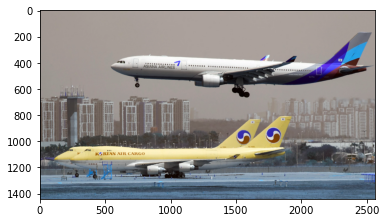

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('sample.jpg')
# cv2.imshow('img', img)
plt.imshow(img)
plt.show()

# 원래는 cv2.imshow()를 하면 되지만, 현재 이미지에 오류가 있어 임시적으로 matplotlib을 사용함

In [4]:
# 이미지의 크기 가져오기

img.shape
# 높이, 넓이, 채널(색상 정보)
# 채널이 3일 경우 다색 이미지, 1일 경우 단색 이미지

(1440, 2560, 3)

(300, 300, 3)


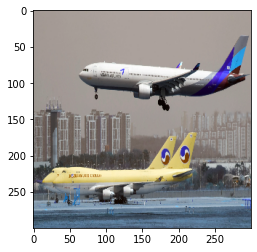

In [5]:
# 이미지 리사이즈

# 넓이, 높이를 지정해 리사이즈 가능(확대 축소 다 가능)
resize_img = cv2.resize(img, (300, 300))
print(resize_img.shape)

plt.imshow(resize_img)
plt.show()

(500, 500, 3)


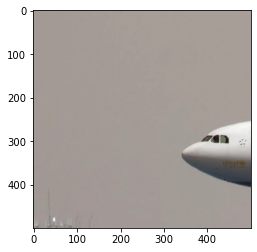

In [6]:
cut_img = img[100:600, 200:700].copy()
print(cut_img.shape)

plt.imshow(cut_img)
plt.show()

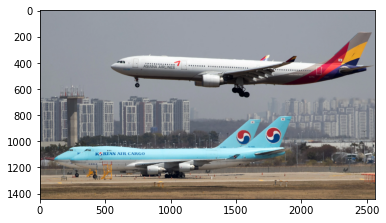

In [28]:
# 근데, 이미지 색상이 좀 이상하지 않습니까??
# 이미지의 색상값이 RGB가 아닌, BGR로 설정되어 있기 때문
# 따라서, 색상을 BGR에서 RGB로 변경해야 함
# 색상 변경 관련한 코드는 BGR2RGB말고 다른 옵션들도 많습니다.
# https://lucathree.github.io/python/day43-3/

%matplotlib inline
img = cv2.imread('sample.jpg', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR to RGB
plt.imshow(img2)
plt.show()

In [12]:
img.shape[0] * 0.8

1152.0

height 576 width 1007


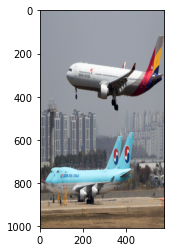

In [31]:
# 몇 %의 비율로 이미지를 줄일 것인지 계산 가능
# 사칙연산이나 기타 로직 사용x
# 높이를 80%로 줄이고 싶다면 img.shape[0] * 0.8

%matplotlib inline
height = int(img2.shape[0] * 0.4)
width = int(img2.shape[0] * 0.7)
print('height', height, 'width', width)
resize_img2 = cv2.resize(img2, (height, width))
plt.imshow(resize_img2)
plt.show()